# K-Means Cluster

Code adapted from https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb
MIT Licensed

$k$-means algorithm creates $k$ clusters of records within a data based upon using a similarity measure (typically distance)

## Inputs:
* Number of clusters to create ($k$)
* Dataset

## Outputs
* Cluster membership

## Process
1. Randomly assign $k$ points as cluster center.  Let $C$ be the set of the those centers
2. Repeat until the center set($C$) is unchanged:
   1. Assign the remain points to each cluster based upon which center point they are most similar to (expectation)
   1. Compute $C_n$ as the set of points which are the arithmetic mean of each cluster (maximization)
   1. If $C_n = C$, stop.  Algorithm has converged.  Output cluster membership<br>
     else $C = C_n$.  Unassign all cluster membership


## Intuition
Algorithm considers "_optimal_" where each point is closest to its own cluster center than any other. Expectation-Maximization (EM) based algorithm.  


$k$-mediods is pretty much the same as $k$-means except actually record instances function as the mean rather than a theoritical center.


## Downsides
* Works for a predefined number of clusters
* Can only find clusters that have linear boundaries - will only see "convex" shaped clusters
* Slow for a large number of instances
* Not guaranteed to find the global optimum

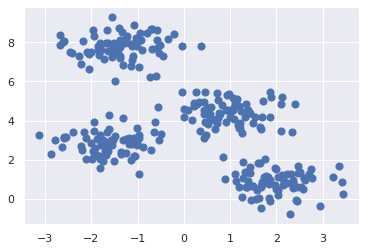

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Generate sample data and plot
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Number of iterations:  3


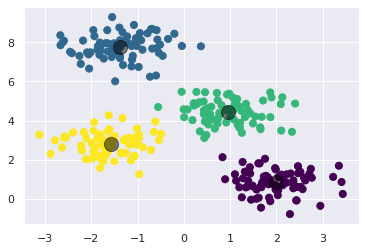

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print ("Number of iterations: ", kmeans.n_iter_)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Let's see what $k = 2$ does ...

Number of iterations:  9


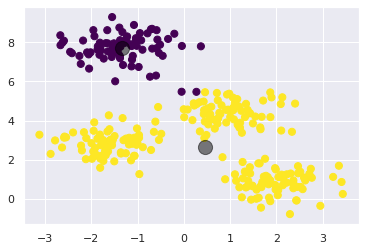

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print ("Number of iterations: ", kmeans.n_iter_)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Let's see what  𝑘=6  does ...

Number of iterations:  11


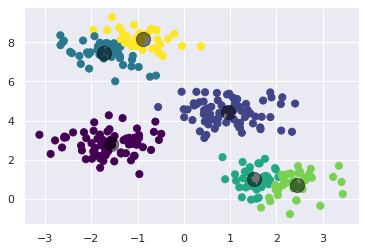

In [4]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print ("Number of iterations: ", kmeans.n_iter_)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Elbow Method
Compute the sum of squared distances of the samples to their closest cluster center - within cluster sum of squares (WCSS)

Find the point of diminishing  returns

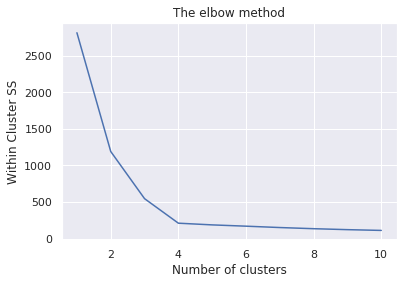

In [5]:
ssd = []
kMin = 1
kMax = 10 
for i in range(kMin, kMax+1):  # try 300 to demonstrate the WCCS going to zero, just be prepared to wait
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(kMin, kMax+1), ssd)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster SS')
plt.show()

# Silhouette

Measure of similarity versus separation.  Scores range from -1 to +1.

High scores indicate good cohesion and separation.  

For each point:
* $a_i$ = average distance of i to the points in its cluster!
* $b_i$ = min (average distance of i  to points in another cluster)
* $s _i\begin{cases}
1 - a_i/b_i& \textrm{if } a_i < b_i\\
0& \textrm{if } a_i = b_i\\
b_i/a_i - 1& \textrm{if } a_i < b_i
\end{cases}  $

Can calculate the average silhouette width for a clusters as well as for all clusters

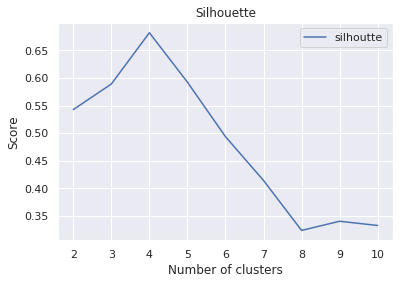

In [6]:
from sklearn.metrics import  silhouette_score, silhouette_samples

sh  = []
kMin = 2
kMax = 10 
for i in range(kMin, kMax+1):  # try 300 to demonstrate the WCCS going to zero, just be prepared to wait
    kmeans = KMeans(n_clusters = i)
    c = kmeans.fit_predict(X)
    sh.append(silhouette_score(X,c))

    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(kMin, kMax+1), sh, label="silhoutte")
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923875148758644
For n_clusters = 6 The average silhouette_score is : 0.49934504405927566
For n_clusters = 7 The average silhouette_score is : 0.42439982271583093
For n_clusters = 8 The average silhouette_score is : 0.3249897986721671
For n_clusters = 9 The average silhouette_score is : 0.34339638088479923
For n_clusters = 10 The average silhouette_score is : 0.34162450580368353


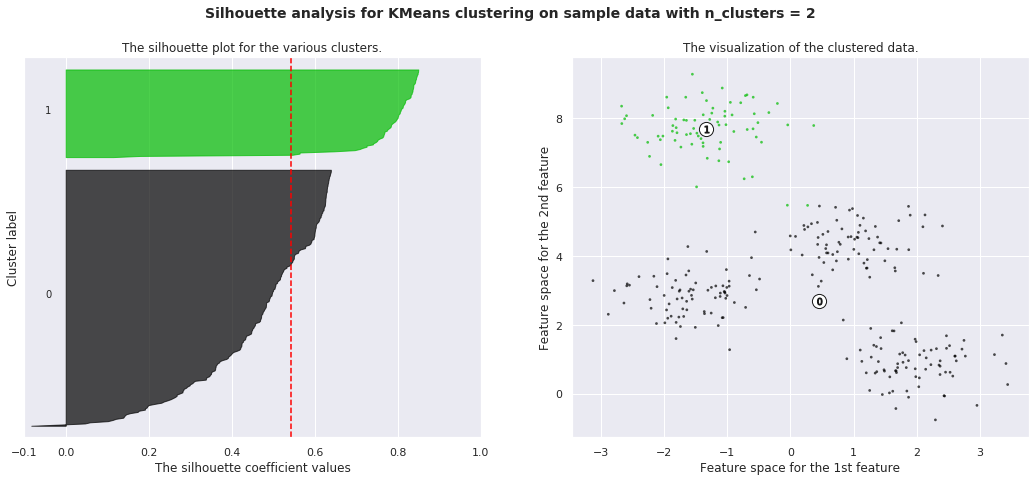

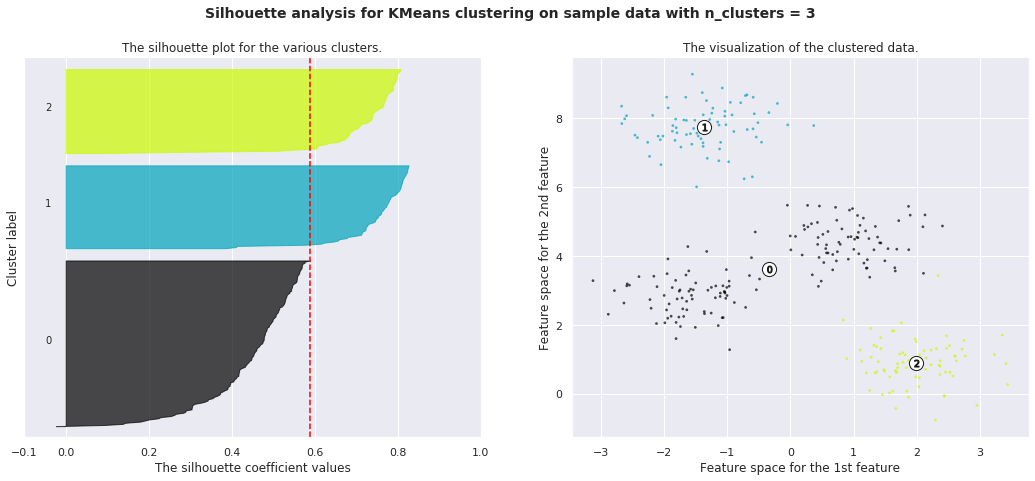

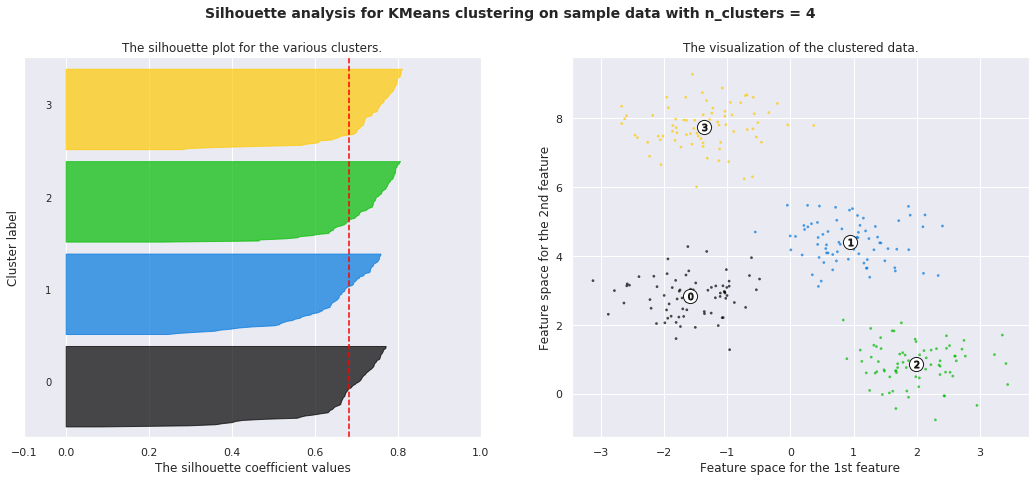

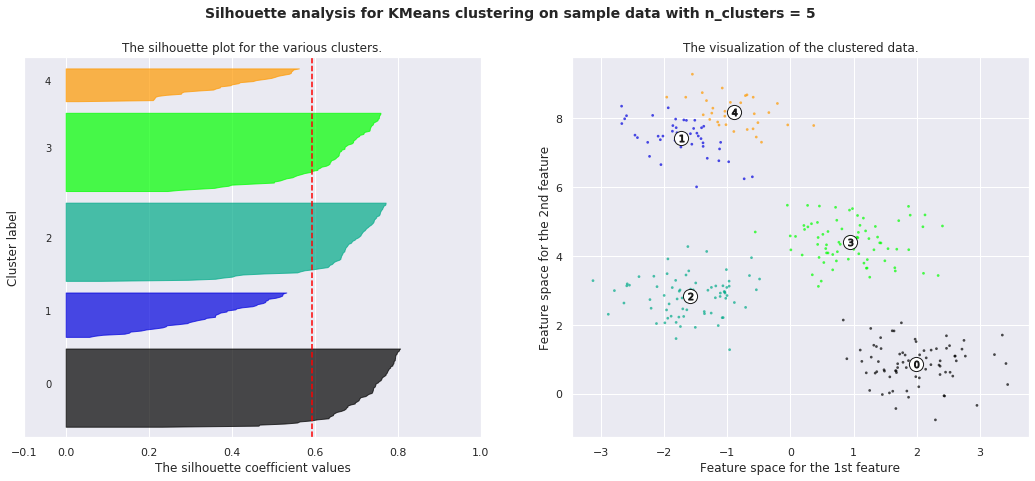

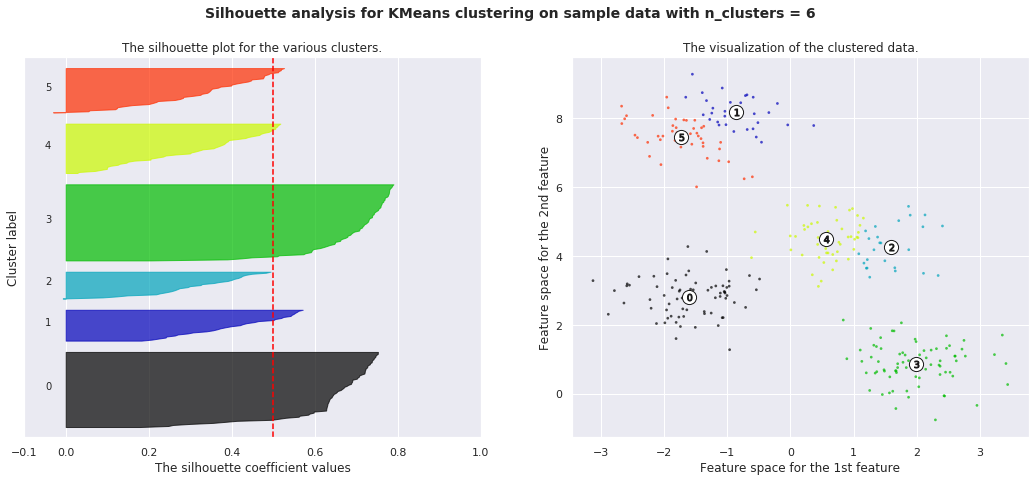

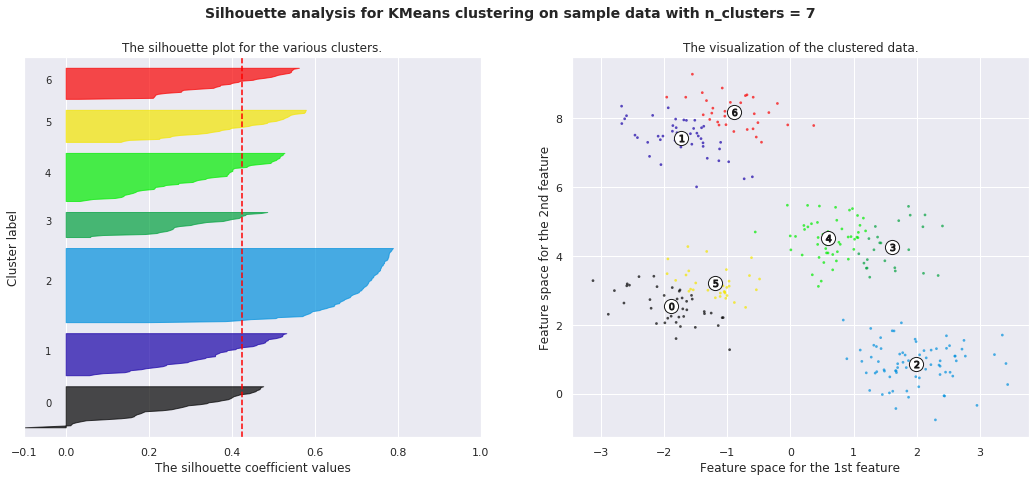

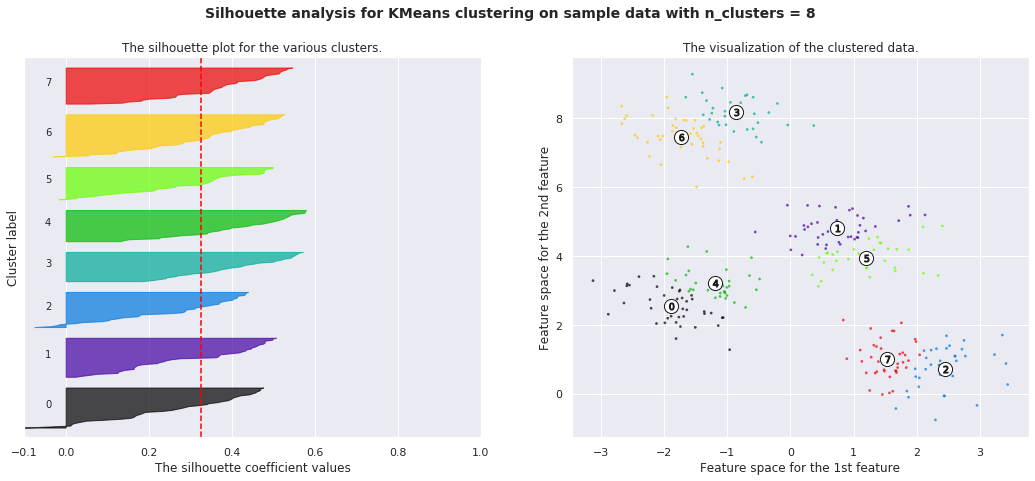

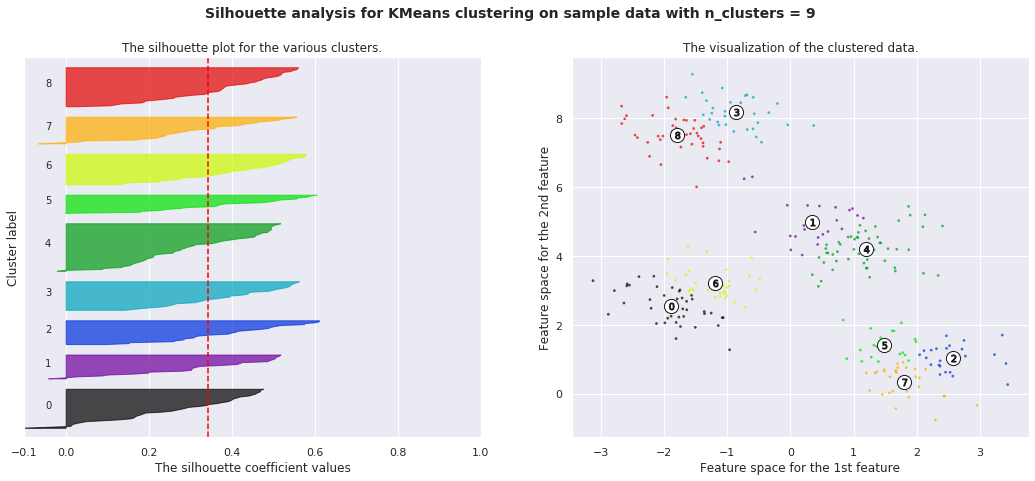

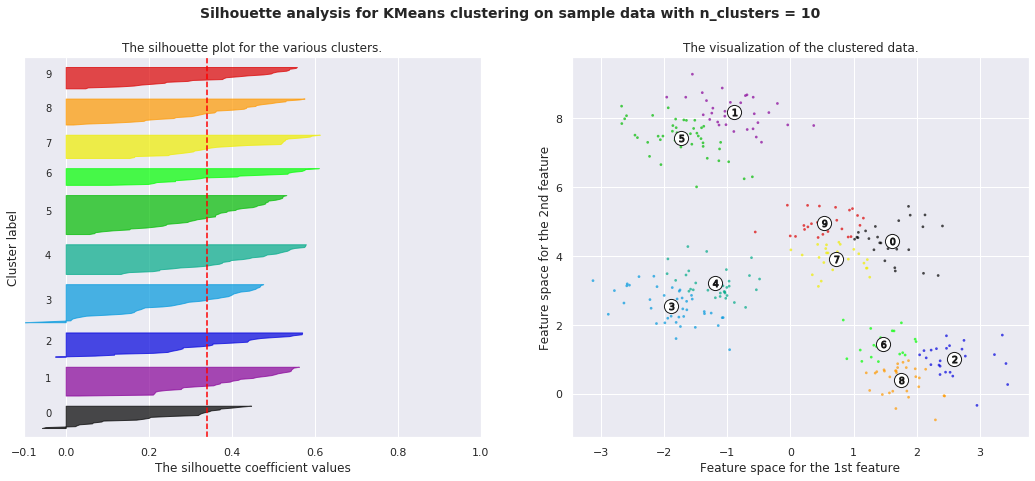

In [7]:
# Code from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

import matplotlib.cm as cm

for n_clusters in range(kMin, kMax+1):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Gap Statistic

Code from https://anaconda.org/milesgranger/gap-statistic/notebook
Text from: https://datasciencelab.wordpress.com/tag/gap-statistic/

    
The gap statistic was developed by Stanford researchers Tibshirani, Walther and Hastie in their 2001 paper. The idea behind their approach was to find a way to standardize the comparison of \log W_k with a null reference distribution of the data, i.e. a distribution with no obvious clustering. Their estimate for the optimal number of clusters K is the value for which \log W_k falls the farthest below this reference curve. This information is contained in the following formula for the gap statistic:

The following measure represents the sum of intra-cluster distances between points in a given cluster C_k containing n_k points:

$ D_k = \sum_{\mathrm{x}_i \in C_k} \sum_{\mathrm{x}_j \in C_k} ||\mathrm{x}_i - \mathrm{x}_j ||^2 = 2 n_k \sum_{\mathrm{x}_i \in C_k} ||\mathrm{x}_i - \mu_k ||^2$

Adding the normalized intra-cluster sums of squares gives a measure of the compactness of our clustering:

$W_k = \sum_{k=1}^K \frac{1}{2n_k} D_k$

This variance quantity W_k is the basis of a naive procedure to determine the optimal number of clusters: the elbow method.


${Gap}_n(k) = E_n^*\{\log W_k\} - \log W_k$

The reference datasets are in our case generated by sampling uniformly from the original dataset’s bounding box (see green box in the upper right plot of the figures below). To obtain the estimate $E_n^*\{\log W_k\}$ we compute the average of B copies $\log W^*_k$ for $B=10$, each of which is generated with a Monte Carlo sample from the reference distribution. Those $\log W^*_k$ from the B Monte Carlo replicates exhibit a standard deviation ${sd}(k)$ which, accounting for the simulation error, is turned into the quantity

$s_k = \sqrt{1+1/B}\,\mathrm{sd}(k)$

Finally, the optimal number of clusters $K$ is the smallest $k$ such that ${Gap}(k) \geq \mathrm{Gap}(k+1) - s_{k+1}$.    


In [15]:
import pandas as pd

def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [16]:
k, gapdf = optimalK(X, nrefs=5, maxClusters=15)
print ('Optimal k is: ', k)

Optimal k is:  4


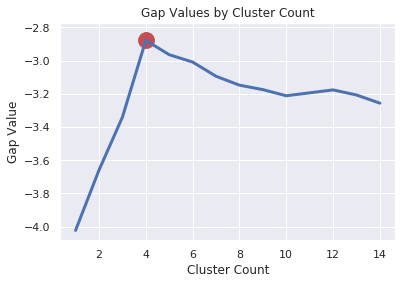

In [17]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()